# Load dataset
The dataset is already tokenized and integer encoded <br>
But the dataset is not padded

In [1]:
from keras.datasets import imdb
(x, y), (x_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Padding

In [2]:
from keras.utils import pad_sequences

x = pad_sequences(x, padding='post')
x_test = pad_sequences(x_test, padding='post')

In [3]:
x.shape

(25000, 2494)

# Create model

In [4]:
from keras import Sequential
from keras.layers import *

In [5]:
model = Sequential(name='input_layer')

model.add(SimpleRNN(units=100, input_shape=(x.shape[1],1), return_sequences=False))

model.add(Dense(units=1, activation='sigmoid', name='output_layer'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.name = 'rnn_sentiment_analysis'
model.summary()

Model: "rnn_sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, validation_data=(x_test, y_test), epochs=1).history
model.save(model.name + ".keras")

782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 188ms/step - accuracy: 0.4939 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6946


# Evaluate model performance

In [8]:
import matplotlib.pyplot as plt

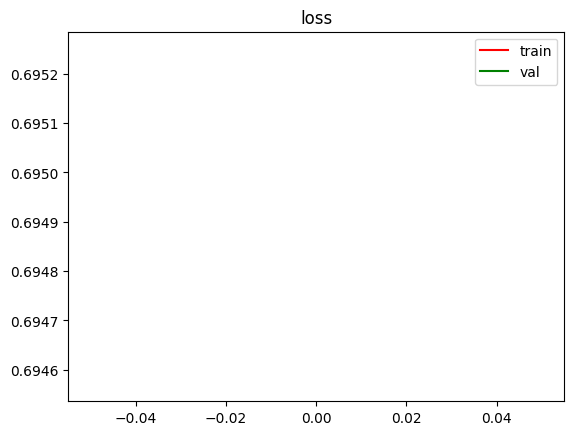

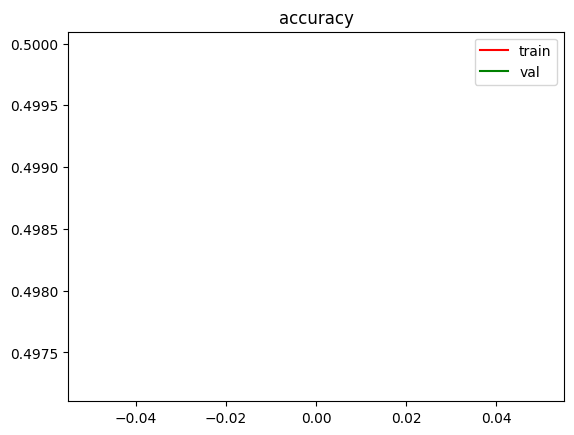

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(history['loss'], label='train', color='red')
plt.plot(history['val_loss'], label='val', color='green')
plt.title('loss')
plt.legend()
plt.show()
plt.savefig('loss.png')

plt.plot(history['accuracy'], label='train', color='red')
plt.plot(history['val_accuracy'], label='val', color='green')
plt.title('accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy.png')